# Predicit if the income of the individual is greater than 50k or not.
# Random Forest Classifier



In [1]:
#Census Data Set

import warnings
warnings.filterwarnings('ignore')

import numpy as np  # I may not be using it

# For EDA and cleaning the data
import pandas as pd

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For building a model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
income_df = pd.read_csv(r'C:\Users\Gayatri\Desktop\adult.csv', names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                                           'marital-status', 'occupation', 'relationship', 'race',
                                           'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
                                           'native-country', 'salary'])

In [3]:
income_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
income_df.shape

(32561, 15)

In [5]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
income_df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
income_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [8]:
income_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


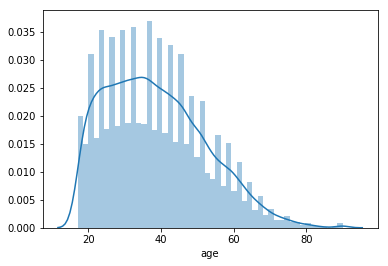

In [9]:
sns.distplot(income_df.age)

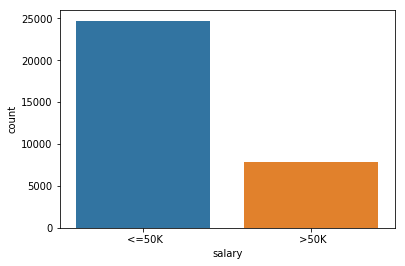

In [10]:
sns.countplot(income_df.salary)

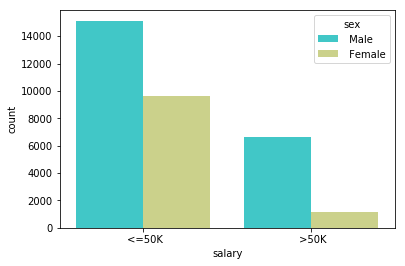

In [11]:
sns.countplot(income_df.salary, hue=income_df.sex, palette='rainbow')

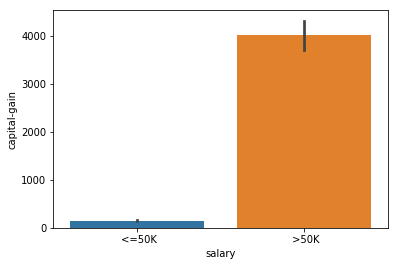

In [12]:
sns.barplot(income_df.salary, income_df['capital-gain'])

In [13]:
income_df.occupation.unique()


array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

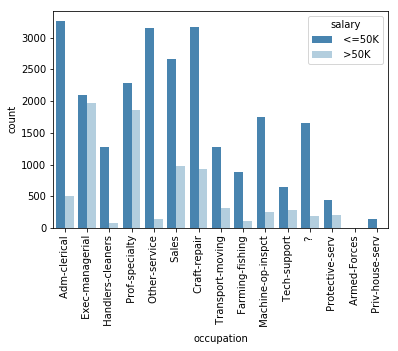

In [14]:
plt.xticks(rotation=90)
sns.countplot(income_df.occupation, hue=income_df.salary, palette='Blues_r')


In [15]:
income_df.relationship.unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

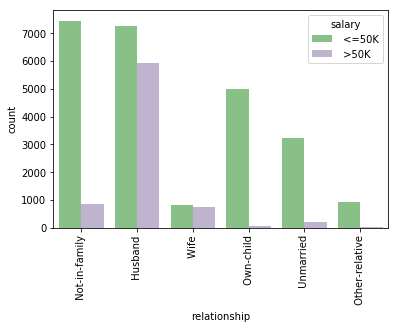

In [16]:
plt.xticks(rotation=90)

sns.countplot(income_df.relationship, hue=income_df.salary, palette='Accent')

In [17]:
income_df.workclass.value_counts()


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

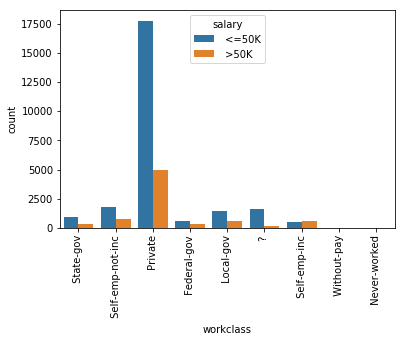

In [18]:
plt.xticks(rotation=90)
sns.countplot(income_df.workclass, hue=income_df.salary)

In [19]:
income_df.race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

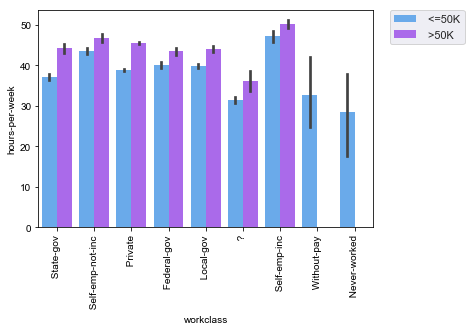

In [20]:
plt.xticks(rotation=90)
sns.barplot(income_df.workclass, income_df['hours-per-week'], hue=income_df.salary, palette='cool')
sns.set()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


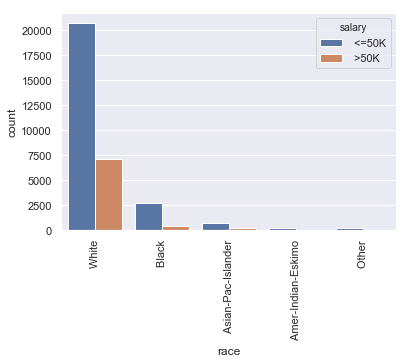

In [21]:
plt.xticks(rotation=90)
sns.countplot(income_df.race, hue=income_df.salary)

In [22]:
income_df.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [23]:
income_df.drop(['fnlwgt', 'education-num'], axis=1, inplace=True)


In [24]:
income_df.head()


,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [25]:
dummies = pd.get_dummies(income_df.drop(['salary', 'age', 'capital-gain', 'capital-loss',
                                        'hours-per-week'], axis=1))

In [26]:
dummies.shape


(32561, 102)

In [27]:
dummies.head()


,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
merged = pd.concat([income_df, dummies], axis=1)


In [29]:
merged.shape


(32561, 115)

In [30]:
merged.head()


,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,...,0,0,0,0,0,0,0,1,0,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
merged.columns[:100]


Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'salary', 'workclass_ ?',
       'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'marital-status_ Divorced',
       'marital-status_ Married-AF-spouse',
       'marital-status_ Married-civ-spouse',
       'marital-status_ Married-spou

In [32]:
final_df = merged.drop(['workclass', 'education', 'marital-status', 'occupation', 'relationship',
                       'race', 'sex', 'native-country'], axis=1)


In [33]:
final_df.head()


,age,capital-gain,capital-loss,hours-per-week,salary,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,2174,0,40,<=50K,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,0,0,13,<=50K,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,0,0,40,<=50K,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,0,0,40,<=50K,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,0,0,40,<=50K,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [34]:
final_df.shape


(32561, 107)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop('salary', axis=1), final_df.salary, 
                                                   test_size=0.30, random_state=4)

In [36]:
X_train.shape


(22792, 106)

In [37]:
X_test.shape


(9769, 106)

# Applying Logistic Regression

In [38]:
lr=LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print(metrics.classification_report(y_test, predictions))
metrics.accuracy_score(y_test, predictions)

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      7401
        >50K       0.73      0.60      0.66      2368

   micro avg       0.85      0.85      0.85      9769
   macro avg       0.80      0.76      0.78      9769
weighted avg       0.84      0.85      0.84      9769



0.8488074521445389

# Applying KNN

In [39]:
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(metrics.classification_report(y_test, predictions))
metrics.accuracy_score(y_test, predictions)

              precision    recall  f1-score   support

       <=50K       0.88      0.91      0.89      7401
        >50K       0.68      0.63      0.65      2368

   micro avg       0.84      0.84      0.84      9769
   macro avg       0.78      0.77      0.77      9769
weighted avg       0.83      0.84      0.84      9769



0.8377520728836114

# Applying Decision Tree Classifier

In [40]:
dt=DecisionTreeClassifier()
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)
print(metrics.classification_report(y_test, predictions))
metrics.accuracy_score(y_test, predictions)


              precision    recall  f1-score   support

       <=50K       0.87      0.88      0.88      7401
        >50K       0.61      0.61      0.61      2368

   micro avg       0.81      0.81      0.81      9769
   macro avg       0.74      0.74      0.74      9769
weighted avg       0.81      0.81      0.81      9769



0.8108301770907974

# Applying Random Forest Classifier

In [41]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print(metrics.classification_report(y_test, predictions))
metrics.accuracy_score(y_test, predictions)

              precision    recall  f1-score   support

       <=50K       0.88      0.92      0.90      7401
        >50K       0.70      0.62      0.66      2368

   micro avg       0.84      0.84      0.84      9769
   macro avg       0.79      0.77      0.78      9769
weighted avg       0.84      0.84      0.84      9769



0.8434844917596479

# Applying GaussianNB

In [42]:
nb=GaussianNB()
nb.fit(X_train, y_train)
predictions = nb.predict(X_test)
print(metrics.classification_report(y_test, predictions))
metrics.accuracy_score(y_test, predictions)


              precision    recall  f1-score   support

       <=50K       0.93      0.78      0.85      7401
        >50K       0.54      0.82      0.65      2368

   micro avg       0.79      0.79      0.79      9769
   macro avg       0.74      0.80      0.75      9769
weighted avg       0.84      0.79      0.80      9769



0.7888217831917289

# Applying Gradient Boosting Classifier

In [43]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
predictions = gbm.predict(X_test)
print(metrics.classification_report(y_test, predictions))
metrics.accuracy_score(y_test, predictions)


              precision    recall  f1-score   support

       <=50K       0.88      0.95      0.91      7401
        >50K       0.79      0.59      0.67      2368

   micro avg       0.86      0.86      0.86      9769
   macro avg       0.83      0.77      0.79      9769
weighted avg       0.86      0.86      0.85      9769



0.8622172177295526